In [1]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(rc={'axes.facecolor':'lavender', 'figure.facecolor':'ghostwhite'})

In [2]:
#import colors.csv
colors = pd.read_csv('colors.csv')
print(colors)

       id                          name     rgb is_trans
0      -1                       Unknown  0033B2        f
1       0                         Black  05131D        f
2       1                          Blue  0055BF        f
3       2                         Green  237841        f
4       3                Dark Turquoise  008F9B        f
..    ...                           ...     ...      ...
130  1004  Trans Flame Yellowish Orange  FCB76D        t
131  1005             Trans Fire Yellow  FBE890        t
132  1006        Trans Light Royal Blue  B4D4F7        t
133  1007                 Reddish Lilac  8E5597        f
134  9999                    [No Color]  05131D        f

[135 rows x 4 columns]


In [3]:
#determine how many columns in colors are null
nan_count_colors = colors.isna().sum()
print(nan_count_colors)

id          0
name        0
rgb         0
is_trans    0
dtype: int64


In [4]:
#use value_counts to determine how many LEGO colors exist
print('Number of LEGO colors: ' + str(len(colors.index)))

Number of LEGO colors: 135


In [5]:
#determine how many translucent colors there are
colors.value_counts(subset=['is_trans'])

is_trans
f           107
t            28
dtype: int64

In [6]:
#replace 'Unknown' based on hex code in column 'rgb' color name using df.loc[]
colors.loc[colors['name'] == 'Unknown','name'] = 'Very Dark Blue'

#replace '[No Color]' based on hex code in column 'rgb' color name using df.loc[]
colors.loc[colors['name'] == '[No Color]', 'name'] = 'Mainly Blue'

#print result to check changes
print(colors)
colors.to_csv('updated_colors.csv')

       id                          name     rgb is_trans
0      -1                Very Dark Blue  0033B2        f
1       0                         Black  05131D        f
2       1                          Blue  0055BF        f
3       2                         Green  237841        f
4       3                Dark Turquoise  008F9B        f
..    ...                           ...     ...      ...
130  1004  Trans Flame Yellowish Orange  FCB76D        t
131  1005             Trans Fire Yellow  FBE890        t
132  1006        Trans Light Royal Blue  B4D4F7        t
133  1007                 Reddish Lilac  8E5597        f
134  9999                   Mainly Blue  05131D        f

[135 rows x 4 columns]


In [7]:
#import inventory_parts file
inventory_parts = pd.read_csv('inventory_parts.csv')

#join colors and inventory_parts as colors_inventory
colors_inventory = colors.merge(inventory_parts, how='left', left_on='id',right_on='color_id')
print(colors_inventory)

          id            name     rgb is_trans  inventory_id      part_num  \
0         -1  Very Dark Blue  0033B2        f          80.0     belvfair6   
1         -1  Very Dark Blue  0033B2        f          80.0     belvfem26   
2         -1  Very Dark Blue  0033B2        f          80.0    belvmale13   
3         -1  Very Dark Blue  0033B2        f         214.0         fab6e   
4         -1  Very Dark Blue  0033B2        f         250.0     belvfair4   
...      ...             ...     ...      ...           ...           ...   
580250  9999     Mainly Blue  05131D        f       17826.0         30890   
580251  9999     Mainly Blue  05131D        f       18221.0     8880stk01   
580252  9999     Mainly Blue  05131D        f       18322.0  75171stkpr01   
580253  9999     Mainly Blue  05131D        f       18704.0         34100   
580254  9999     Mainly Blue  05131D        f       18708.0         20243   

        color_id  quantity is_spare  
0           -1.0       1.0        f  

In [8]:
#group the types of parts by their color and count the number of types of parts with that color; sort values based on number of types of parts with that color
colors_inventory_color_per_type = colors_inventory.groupby(['name'])['name'].count().sort_values(ascending=False).reset_index(name='num_types_bricks_of_each_color')
print(colors_inventory_color_per_type.head(10))

                name  num_types_bricks_of_each_color
0              Black                          115176
1              White                           66549
2  Light Bluish Gray                           55317
3                Red                           50217
4   Dark Bluish Gray                           43913
5             Yellow                           38837
6               Blue                           29857
7         Light Gray                           25339
8      Reddish Brown                           14168
9                Tan                           13681


In [9]:
#import inventories 
inventories = pd.read_csv('inventories.csv')

#join inventory with inventories on inventory_id = id using an inner join to return matching records
colors_inventory_inventories = pd.merge(colors_inventory, inventories, how='inner', left_on='inventory_id',right_on='id', suffixes=('_colors','_inventories'))

#drop irrelevant columns
colors_inventory_inventories.drop(['inventory_id','part_num','is_spare','version','color_id','id_inventories'], axis=1, inplace=True)

#colors_inventory_inventories shows what colors appear in what sets
print(colors_inventory_inventories)

        id_colors            name     rgb is_trans  quantity       set_num
0              -1  Very Dark Blue  0033B2        f       1.0        5827-1
1              -1  Very Dark Blue  0033B2        f       1.0        5827-1
2              -1  Very Dark Blue  0033B2        f       1.0        5827-1
3               1            Blue  0055BF        f       2.0        5827-1
4               1            Blue  0055BF        f       2.0        5827-1
...           ...             ...     ...      ...       ...           ...
580246       9999     Mainly Blue  05131D        f       1.0        9874-1
580247       9999     Mainly Blue  05131D        f       1.0        6861-2
580248       9999     Mainly Blue  05131D        f       1.0  DKLEGOBOOK-2
580249       9999     Mainly Blue  05131D        f       1.0        8891-1
580250       9999     Mainly Blue  05131D        f       1.0         890-2

[580251 rows x 6 columns]


In [10]:
#create color_sets to store the number of times colors appear in sets 
color_sets = colors_inventory_inventories.groupby(['id_colors','rgb','name'])['quantity'].count().sort_values(ascending=False).reset_index(name='count')
print(color_sets)

#descriptive statistics for colors_sets to determine cutoff for most common and least common colors
color_sets['count'].describe().astype(int)

     id_colors     rgb                    name   count
0            0  05131D                   Black  115176
1           15  FFFFFF                   White   66549
2           71  A0A5A9       Light Bluish Gray   55317
3            4  C91A09                     Red   50217
4           72  6C6E68        Dark Bluish Gray   43913
..         ...     ...                     ...     ...
126         68  F3CF9B       Very Light Orange       2
127        503  E6E3DA         Very Light Gray       2
128       1001  9391E4           Medium Violet       2
129         62  3CB371            Chrome Green       2
130       1006  B4D4F7  Trans Light Royal Blue       1

[131 rows x 4 columns]


count       131
mean       4429
std       14307
min           1
25%          24
50%         255
75%        1971
max      115176
Name: count, dtype: int64

['#AA4D8E', '#DCBC81', '#F2F3F2', '#A5A5CB', '#CD6298', '#6C96BF', '#845E84', '#68BCC5', '#645A4C', '#899B5F', '#7DBFDD', '#96709F', '#F9BA61', '#E6E8FA', '#FEBABD', '#55A5AF', '#D9E4A7', '#FECCCF', '#B31004', '#635F61', '#DAB000', '#C0F500', '#F785B1', '#000000', '#000000', '#ABADAC', '#2032B0', '#1B2A34', '#F2705E', '#F3CF9B', '#E6E3DA', '#9391E4', '#3CB371', '#B4D4F7']


[Text(0.5, 0, 'Name of Color'),
 Text(0, 0.5, 'Count of Appearances in Parts'),
 Text(0.5, 1.0, 'Number of Appearances of Rare Colors in Parts in Lego sets, 1950-2017')]

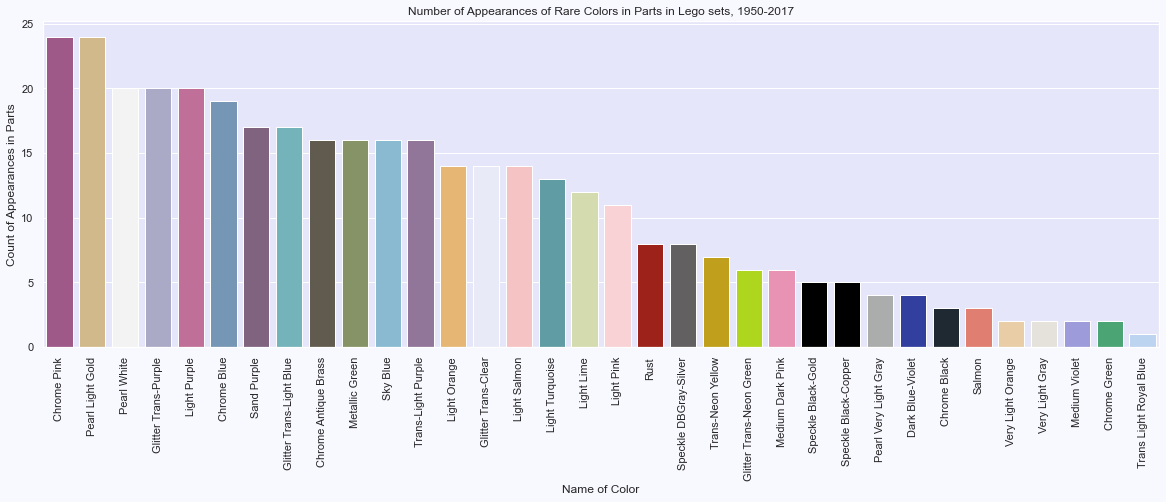

In [11]:
#assume rare colors are colors lower than the 25th percentile
#use len() function to count rows with single condition (color_sets['count'] < 24) since 24 is the 25th percentile
color_sets_rare = len(color_sets[color_sets['count'] <= 24])

#determine least common colors/rare colors
rare_colors = color_sets.tail(color_sets_rare)

#rename 'name' to 'rare_name'
rare_colors = rare_colors.rename(columns = {'name':'rare_name'}).reset_index(drop=True)
rare_colors.to_csv('rare_colors.csv')

#create a list of hex codes of the rare color from rare_colors
color_list = list(rare_colors['rgb'])

#add a hashtag to each list item in color_list
color_list_updated = ["#" + color for color in color_list]

#change Glitter Trans Clear hex code to be a visible color; hex code color for glitter is #E6E8FA
for i in range(len(color_list_updated)):
    if color_list_updated[i] == '#FFFFFF':
         color_list_updated[i] = '#E6E8FA'

#set color palette for sns 
sns.set_palette(sns.color_palette(color_list_updated))
print(color_list_updated)

#plot number of rare color appearances in parts in Lego Sets
fig, ax = plt.subplots(figsize=(20, 6))
ax = sns.barplot(data=rare_colors, x='rare_name', y='count') #y is the number of times that a color appears in any set
plt.xticks(rotation=90)
ax.set(xlabel='Name of Color', ylabel='Count of Appearances in Parts', title='Number of Appearances of Rare Colors in Parts in Lego sets, 1950-2017')


In [12]:
#determine how many colors in each set
colors_in_sets = colors_inventory_inventories.groupby(['set_num'])['quantity'].count().sort_values(ascending=False).reset_index(name='count')

#what are the mean, min/max, stdev of colors per set
print('Descriptive statistics for colors in sets: \n',colors_in_sets.describe().astype(int))

#print tab for readability
print('\t')

#get rid of sets where the number of colors in a set is less than 10 to see how it impacts the mean
colors_in_sets_filtered = colors_in_sets[colors_in_sets['count'] >= 10]
print('Descriptive statistics for colors in sets minus sets with less than 10 colors: \n', colors_in_sets_filtered.describe().astype(int))


Descriptive statistics for colors in sets: 
        count
count  10713
mean      54
std       68
min        1
25%        9
50%       27
75%       73
max      769
	
Descriptive statistics for colors in sets minus sets with less than 10 colors: 
        count
count   7938
mean      71
std       71
min       10
25%       22
50%       45
75%       98
max      769


In [13]:
#import sets.csv
sets = pd.read_csv('sets.csv')

#save minimum and maximum year - 1 (since data only goes to July 2017) to min_year and max_year, respectively 
max_year = sets['year'].max() - 1
min_year = sets['year'].min()

#join colors_inventory_inventories and sets on set_num 
colors_inventory_sets = pd.merge(colors_inventory_inventories, sets, how='inner', left_on='set_num', right_on='set_num',suffixes=('_colors','_sets'))

#group colors_inventory_sets by year, count the number of sets in each year, sort descending order, and reset and rename index
sets_grouped_by_year = colors_inventory_sets.groupby(['year'])['set_num'].count().sort_values(ascending=False).reset_index(name='num_sets_in_year')

[(1950.0, 2016.0),
 Text(0.5, 1.0, 'Number of Lego Sets from 1950 to 2016'),
 Text(0, 0.5, 'Number of Sets'),
 Text(0.5, 0, 'Year')]

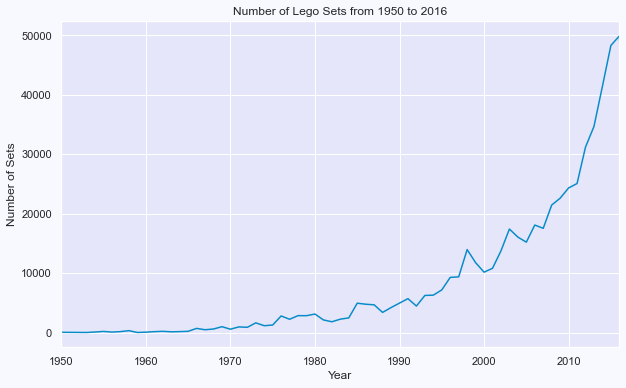

In [14]:
#create a line chart showing change in number of sets each year, color is set to Lego's 'Dark Azure'
fig, ax = plt.subplots(figsize=(10, 6))
ax = sns.lineplot(data=sets_grouped_by_year, x='year', y='num_sets_in_year', color='#078BC9')

#set axes limits based on the minimum and maximum years
ax.set(xlim=(min_year,max_year),title='Number of Lego Sets from 1950 to 2016', ylabel = 'Number of Sets',xlabel='Year')


In [15]:
tnp = colors_inventory_sets.groupby(['name_colors','year','rgb'])['id_colors'].count().reset_index()
print(tnp)

tnp.to_csv('lego.csv')


          name_colors  year     rgb  id_colors
0                Aqua  2000  B3D7D1          1
1                Aqua  2001  B3D7D1          1
2                Aqua  2002  B3D7D1          8
3                Aqua  2003  B3D7D1         13
4                Aqua  2004  B3D7D1         31
...               ...   ...     ...        ...
2078  Yellowish Green  2012  DFEEA5          3
2079  Yellowish Green  2014  DFEEA5         14
2080  Yellowish Green  2015  DFEEA5        108
2081  Yellowish Green  2016  DFEEA5         28
2082  Yellowish Green  2017  DFEEA5         39

[2083 rows x 4 columns]


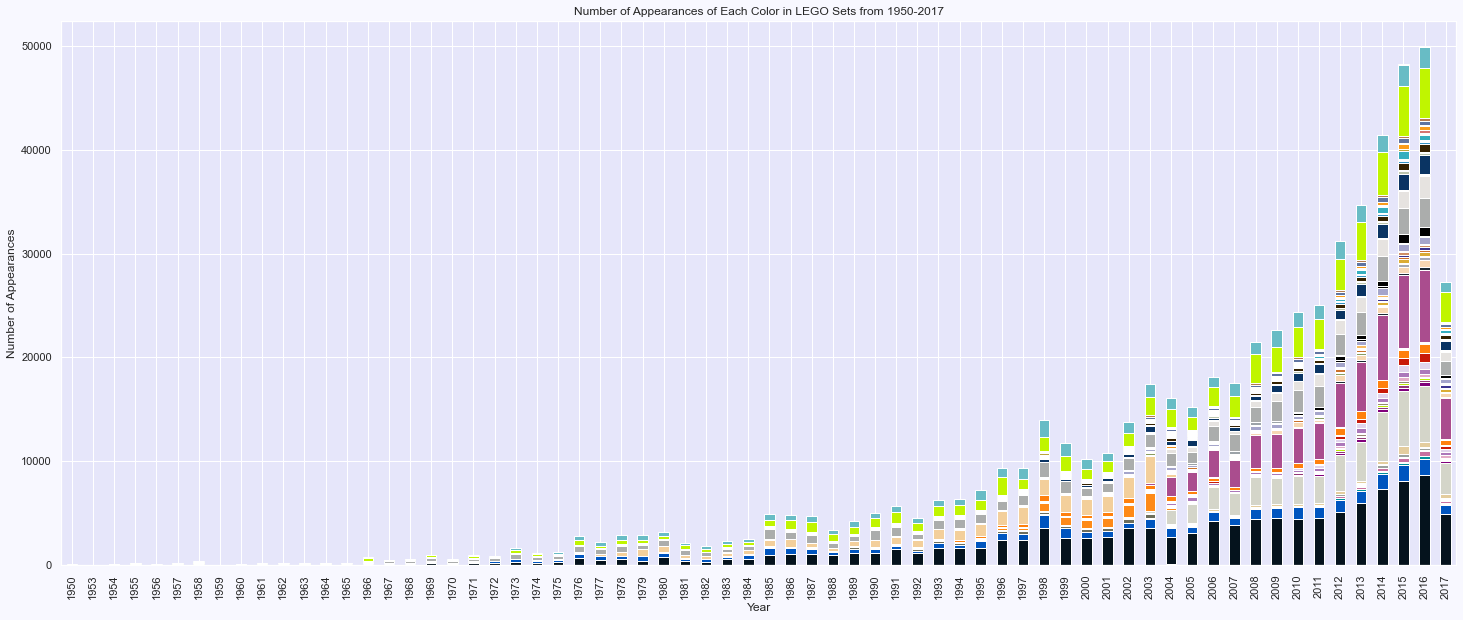

In [16]:
df = pd.read_csv("lego.csv")
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.figsize']=(25,10)

color_palette = colors.rgb.values.tolist()
color_palette_rgb = ['#' + color for color in color_palette]


df_pivot = df.pivot(index='year', columns='name_colors', values='id_colors')
df_pivot.plot(kind='bar',stacked=True, legend=None, color=color_palette_rgb)
plt.title('Number of Appearances of Each Color in LEGO Sets from 1950-2017')
plt.xlabel('Year')
plt.ylabel('Number of Appearances')
plt.show()

In [17]:
#import sets and themes
themes = pd.read_csv('themes.csv')

#join sets and themes
set_themes = sets.merge(right=themes, how='inner', left_on='theme_id', right_on='id', suffixes=('_set','_theme'))
print(set_themes)

        set_num                                           name_set  year  \
0          00-1                                    Weetabix Castle  1970   
1        0011-2                                  Town Mini-Figures  1978   
2        2181-1                                         Infomaniac  1997   
3         300-1                             T-Junction Road Plates  1978   
4         301-1                                 Curved Road Plates  1978   
...         ...                                                ...   ...   
11668   K6762-1                                        Western Kit  2002   
11669   K7623-1        Indiana Jones Classic Adventures Collection  2008   
11670  llca27-1  Legoland Pirate with Parrot (Legoland California)  2006   
11671  LLCA29-1  Pirate Treasure Chest Bank (LLCA Ambassador Pa...  2006   
11672  LLCA30-1  Pirate Ship Diorama (LLCA Ambassador Pass Excl...  2006   

       theme_id  num_parts   id     name_theme  parent_id  
0           414        471 

In [18]:
#determine how many sets per theme
num_themes = set_themes['name_theme'].value_counts()
print(num_themes)

total_themes = num_themes.count()
total_themes
total_sets = num_themes.sum()
total_sets

Supplemental           496
Technic                435
City                   287
Friends                269
Basic Set              257
                      ... 
Ghostbusters             1
Planet Series 3          1
Star Wars Episode 8      1
Imperial Guards          1
Indiana Jones            1
Name: name_theme, Length: 386, dtype: int64


11673

In [19]:
#descriptive statistics of the number of sets per theme
print('Descriptive Statistics of Number of Sets Per Theme:\n',num_themes.describe().astype(int))

Descriptive Statistics of Number of Sets Per Theme:
 count    386
mean      30
std       53
min        1
25%        6
50%       14
75%       27
max      496
Name: name_theme, dtype: int64


In [20]:
#join colors_inventory_inventories with set_themes
color_themes = colors_inventory_inventories.merge(right=set_themes, left_on='set_num', right_on='set_num', how='inner')

#how many colors in each theme
color_themes.groupby(['name_theme'])['name'].count().sort_values(ascending=False)

name_theme
Basic Set                  20233
Star Wars Episode 4/5/6    17357
Ninjago                    16876
Friends                    16603
Creator                    14704
                           ...  
Jumbo Bricks                  11
4 Juniors                     10
Classic Town                   9
Control Lab                    2
HO 1:87 Vehicles               1
Name: name, Length: 379, dtype: int64

In [21]:
#Main Analysis 1: How many defined rare colors are uniquely found in a given theme?

#group by name_theme and name to see the makeup of each theme
color_themes.groupby(['name_theme','name'])['name'].count()

name_theme  name      
12V         Black         576
            Blue          127
            Brown           4
            Dark Gray      25
            Green           1
                         ... 
eLAB        Green           4
            Light Gray     27
            Red             8
            White           4
            Yellow          9
Name: name, Length: 10443, dtype: int64

In [22]:
#determine what rare colors appear in color_themes
rare_colors_in_themes = color_themes.merge(rare_colors, how='inner', left_on='name', right_on='rare_name').groupby(['name_theme','rare_name'])['rare_name'].count()

#reset the index 
rare_colors_in_themes = rare_colors_in_themes.reset_index(name='count_rare_appearance_in_theme')
print(rare_colors_in_themes)
print(rare_colors_in_themes['count_rare_appearance_in_theme'].sum())

    name_theme           rare_name  count_rare_appearance_in_theme
0     Aquazone         Chrome Blue                               1
1     Atlantis  Speckle Black-Gold                               5
2        Basic    Medium Dark Pink                               6
3    Basic Set        Light Purple                              13
4    Basic Set     Very Light Gray                               1
..         ...                 ...                             ...
106     Titans   Trans-Neon Yellow                               1
107        Toa   Trans-Neon Yellow                               2
108   Toa Nuva   Trans-Neon Yellow                               1
109     Turaga   Trans-Neon Yellow                               2
110      Xalax         Sand Purple                               2

[111 rows x 3 columns]
371


In [23]:
#what rare color(s) appears in only one theme
rare_colors_in_themes_count = rare_colors_in_themes['rare_name'].value_counts().reset_index(name='count_rare_appearance_in_theme')
rare_colors_in_themes_count

#keep only the colors that show up in 1 theme and group by theme
rare_colors_in_themes_unique = rare_colors_in_themes_count.loc[rare_colors_in_themes_count['count_rare_appearance_in_theme'] == 1]

rare_colors_in_themes_unique

#Eight colors uniquely show up in themes, but what theme?
rare_colors_in_themes_name_theme = rare_colors_in_themes_unique.merge(right=rare_colors_in_themes, how='inner', left_on='index', right_on='rare_name')

#drop irrelevant columns
rare_colors_in_themes_name_theme_cleaned = rare_colors_in_themes_name_theme.drop(['index','count_rare_appearance_in_theme_y','count_rare_appearance_in_theme_x'], axis=1)

print(rare_colors_in_themes_name_theme_cleaned)


           name_theme               rare_name
0               Scala                  Salmon
1          Space Port            Chrome Green
2             Clikits  Trans Light Royal Blue
3  Knights Kingdom II   Speckle DBGray-Silver
4  Knights Kingdom II    Speckle Black-Copper
5            Atlantis      Speckle Black-Gold
6               Basic        Medium Dark Pink
7           Star Wars            Chrome Black


In [24]:
#how many themes are there
num_themes_total = themes['name'].value_counts()
print('Total Themes: ' + str(len(num_themes.index)))

#how many unique themes are there
num_unique_themes = rare_colors_in_themes_name_theme_cleaned['name_theme'].value_counts()
print('Themes with Unique Colors: ' + str(len(num_unique_themes.index)))
 
#percent of unique themes over total themes 
pct_total_unique_themes = str(round((len(num_unique_themes.index) / len(num_themes.index) * 100),2))
print('Percent Unique Themes: ' + pct_total_unique_themes + '%')

#Analysis 1 Conclusions: There are 8 rare colors that show up in sets that are from 7 different themes themes. Understanding that there are 402 unique themes, this indicated that 
#the number of themes that you can identify by a unique color that only shows up in that theme is 1.74%. This does not support the hypothesis of being able to predict themes based
#on a unique color in that theme. This demonstrates that most themes share colors

Total Themes: 386
Themes with Unique Colors: 7
Percent Unique Themes: 1.81%


           index  num_sets_in_theme
0   Supplemental                496
1        Technic                435
2           City                287
3        Friends                269
4      Basic Set                257
5        Creator                249
6           Gear                246
7  Service Packs                242
8          Duplo                219
9      Star Wars                211


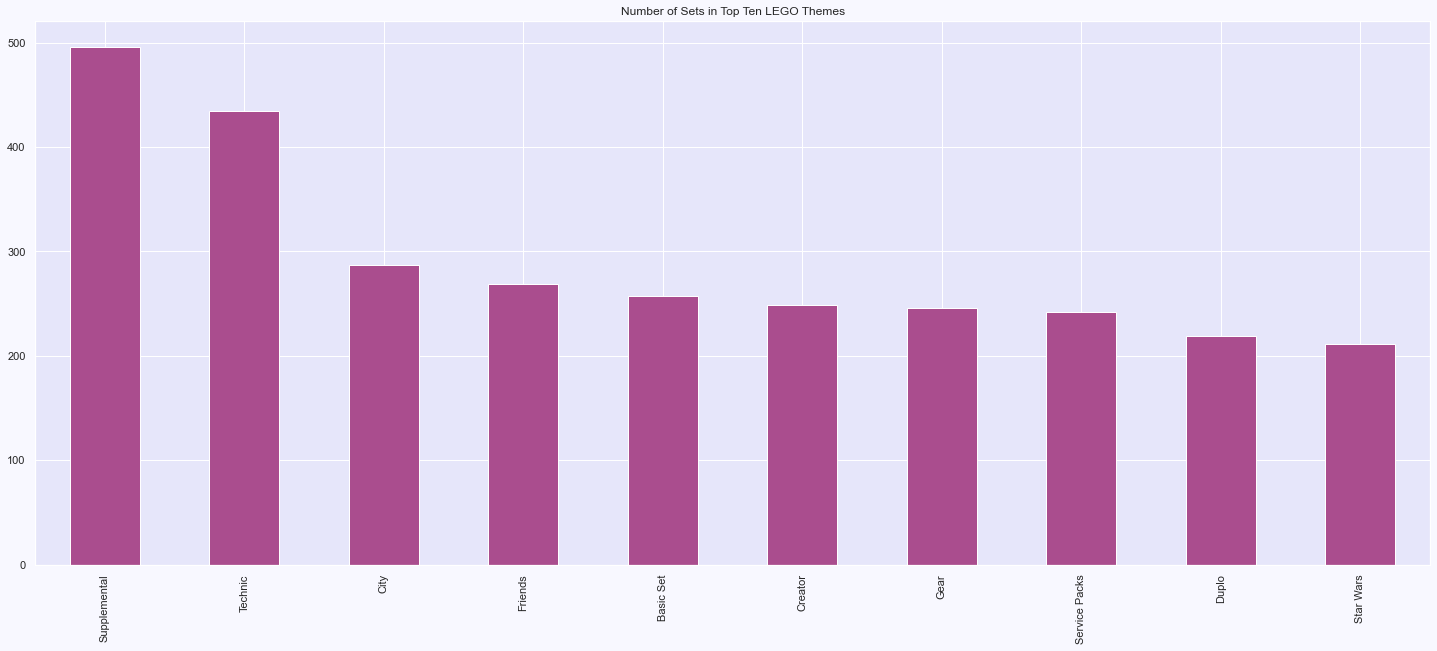

In [31]:
#Main Analysis 2: How many defined rare colors are uniquely found in any of the defined top ten themes?



#top ten themes based on number of sets
num_top_themes = num_themes.head(10).reset_index(name='num_sets_in_theme').plot(kind='bar', x='index', legend=None, title = 'Number of Sets in Top Ten LEGO Themes')
plt.xlabel('')
print(num_themes.head(10).reset_index(name='num_sets_in_theme'))


In [29]:
num_themes_ord = num_themes.reset_index(name='count')
print(num_themes_ord[num_themes_ord['index'] == 'Clikits'])

      index  count
21  Clikits    105


In [30]:
#merge with rare_colors_in_themes_name_theme_cleaned to find what top themes have colors only found in sets of that theme
top_themes_by_color = num_top_themes.merge(right=rare_colors_in_themes_name_theme_cleaned, how='inner',left_on='index',right_on='name_theme')
print(top_themes_by_color)

#Main Analysis 2 Conclusions: Chrome Black was found in Star Wars, a top ten theme that has 211 sets. It still must be determined how common this color is among 
#other Star Wars sets. 

AttributeError: 'AxesSubplot' object has no attribute 'merge'

In [32]:
#Main Analysis 3.1: What colors uniquely appear in all themes? How often do these colors occur in sets in these themes?

#determine what colors show up in what themes and how often
color_themes_grouped = color_themes.groupby(['name_theme','name'])['name'].count().reset_index(name='count_appearance')
color_themes_grouped

#determine what colors only show up in one theme by counting how many times a color appears in the dataframe
color_themes_grouped_count = color_themes_grouped['name'].value_counts().reset_index(name='count_appearance_in_theme')

#keep only the colors that appear in one theme
color_themes_grouped_unique = color_themes_grouped_count.loc[color_themes_grouped_count['count_appearance_in_theme'] == 1]

#trans-pink is the only non-rare color that appears in only one theme; what theme does it appear in?
color_themes_grouped_unique_theme = color_themes_grouped_unique.merge(right=color_themes_grouped, how='inner', left_on='index', right_on='name')

#drop irrelevant/duplicated columns
color_themes_grouped_unique_theme_cleaned = color_themes_grouped_unique_theme.drop(['index','count_appearance'], axis=1)
print(color_themes_grouped_unique_theme_cleaned)

   count_appearance_in_theme          name_theme                    name
0                          1             Clikits              Trans-Pink
1                          1             Clikits  Trans Light Royal Blue
2                          1  Knights Kingdom II    Speckle Black-Copper
3                          1  Knights Kingdom II   Speckle DBGray-Silver
4                          1            Atlantis      Speckle Black-Gold
5                          1               Basic        Medium Dark Pink
6                          1               Scala                  Salmon
7                          1          Space Port            Chrome Green
8                          1           Star Wars            Chrome Black


In [33]:
#how many of these colors are rare colors 
color_themes_grouped_unique_theme_cleaned['is_rare'] = color_themes_grouped_unique_theme_cleaned['name'].isin(rare_colors_in_themes_name_theme_cleaned['rare_name'])
print(color_themes_grouped_unique_theme_cleaned.drop(['count_appearance_in_theme'],axis=1))

#Main Analysis 3.1 Conclusions: Only one color that is unique to a theme is not a defined rare color.

           name_theme                    name  is_rare
0             Clikits              Trans-Pink    False
1             Clikits  Trans Light Royal Blue     True
2  Knights Kingdom II    Speckle Black-Copper     True
3  Knights Kingdom II   Speckle DBGray-Silver     True
4            Atlantis      Speckle Black-Gold     True
5               Basic        Medium Dark Pink     True
6               Scala                  Salmon     True
7          Space Port            Chrome Green     True
8           Star Wars            Chrome Black     True


In [34]:
#Main Analysis 3.2: What is the color makeup of sets in each theme and how often do these colors occur in sets of these themes?

#group color_top_themes by times color appears in theme
color_themes_grouped = color_themes.groupby(['name_theme','name'])['name'].count().reset_index(name='count_color_appearances')

#make theme_name the columns, name the index, and the count_color_appearances the values
color_themes_pivot = color_themes_grouped.reset_index().groupby(['name','name_theme'])['count_color_appearances'].aggregate('first').unstack()
print(color_themes_pivot)

name_theme           12V  4 Juniors   4.5V      9V  Advent  Advent Sub-Set  \
name                                                                         
Aqua                 NaN        NaN    NaN     NaN     NaN             NaN   
Black              576.0        NaN  920.0  1163.0    37.0           122.0   
Blue               127.0        NaN  331.0   252.0    27.0            43.0   
Blue-Violet          NaN        NaN    NaN     NaN     NaN             NaN   
Bright Green         NaN        NaN    NaN     1.0     2.0             1.0   
...                  ...        ...    ...     ...     ...             ...   
Very Light Orange    NaN        NaN    NaN     NaN     NaN             NaN   
Violet               NaN        NaN    NaN     NaN     NaN             NaN   
White              119.0       10.0  210.0   498.0    52.0           115.0   
Yellow             121.0        NaN  281.0   558.0    41.0           124.0   
Yellowish Green      NaN        NaN    NaN     NaN     2.0      

[Text(0.5, 0, 'Name of Color'),
 Text(0, 0.5, 'Count of Color Appearances'),
 Text(0.5, 1.0, 'Number of Appearances of Colors in Atlantis Lego sets')]

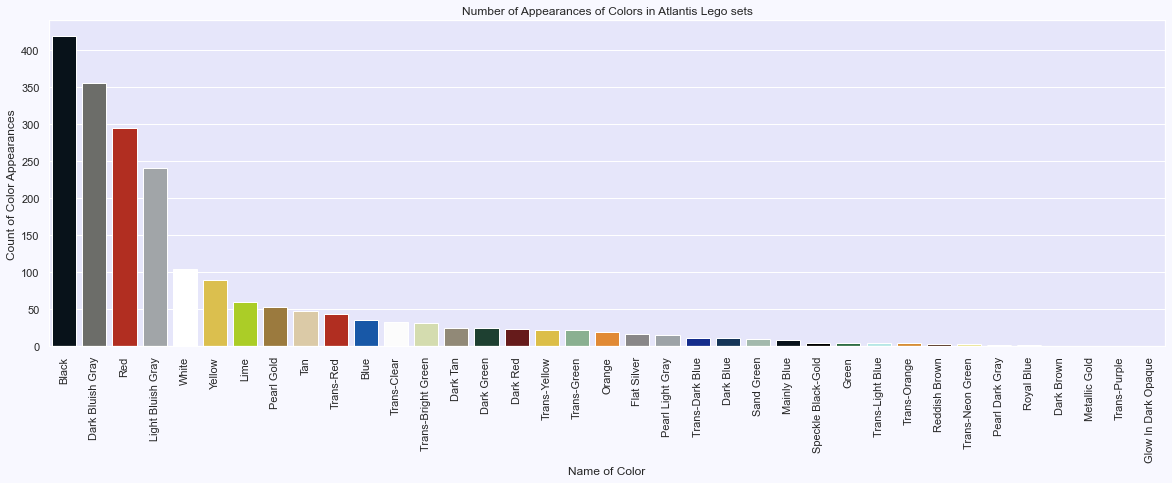

In [35]:
#Explore color makeup for each theme that has a color that uniquely defines the them. 
#The bar graphs will show the number of times each color appears in a set in the theme. The colors of the bars correspond to the hex code color 
#of the color explored.

#create dataframe
atlantis = color_themes_pivot['Atlantis'].dropna().reset_index(name='count_color_appearance_in_theme').sort_values(by='count_color_appearance_in_theme',ascending=False)

#create an updated dataframe with the rgb value
atlantis_rgb = atlantis.merge(right=colors, how='inner', left_on='name', right_on='name')

#add # to each value in rgb column
atlantis_rgb['rgb'] = '#' + atlantis_rgb['rgb']

#create graph of color makeup of these themes to see if unique color occurs frequently

fig, ax = plt.subplots(figsize=(20, 6))
ax = sns.barplot(data=atlantis, x='name', y='count_color_appearance_in_theme', palette=atlantis_rgb['rgb']) #y is the number of times that a color appears in any set
plt.xticks(rotation=90)
ax.set(xlabel='Name of Color', ylabel='Count of Color Appearances', title='Number of Appearances of Colors in Atlantis Lego sets')

In [36]:
atlantis_rgb_unique_color = atlantis_rgb.merge(right=color_themes_grouped_unique_theme_cleaned, how='inner', left_on='name', right_on='name').drop(['id','rgb','is_trans','count_appearance_in_theme'], axis=1)
num_times_appears_atlantis = int(atlantis_rgb_unique_color['count_color_appearance_in_theme'])

print('Number of Times "Speckle Black-Gold" Appears in Atlantis Sets: ' + str(num_times_appears_atlantis))
print('\t')
print('Descriptive Statistics of Number of Times Each Color Appears in "Atlantis" Theme')
atlantis_rgb['count_color_appearance_in_theme'].describe().astype(int)

Number of Times "Speckle Black-Gold" Appears in Atlantis Sets: 5
	
Descriptive Statistics of Number of Times Each Color Appears in "Atlantis" Theme


count     37
mean      55
std      101
min        1
25%        4
50%       19
75%       44
max      419
Name: count_color_appearance_in_theme, dtype: int64

[Text(0.5, 0, 'Name of Color'),
 Text(0, 0.5, 'Count of Color Appearances'),
 Text(0.5, 1.0, 'Number of Appearances of Colors in Star Wars Lego sets')]

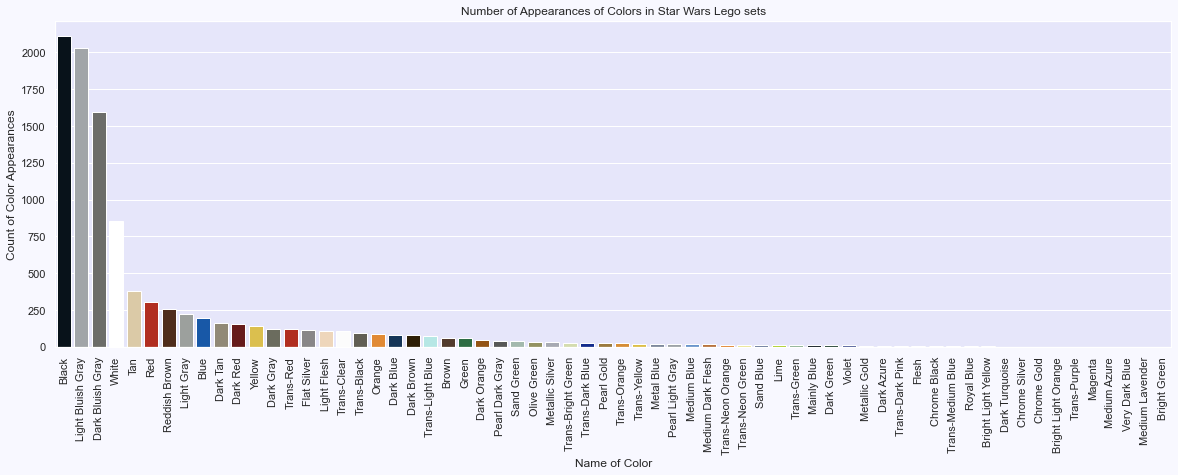

In [45]:
#create dataframe
star_wars = color_themes_pivot['Star Wars'].dropna().reset_index(name='count_color_appearance_in_theme').sort_values(by='count_color_appearance_in_theme',ascending=False)

#create an updated dataframe with the rgb value
star_wars_rgb = star_wars.merge(right=colors, how='inner', left_on='name', right_on='name')

#add # to each value in rgb column
star_wars_rgb['rgb'] = '#' + star_wars_rgb['rgb']

fig, ax = plt.subplots(figsize=(20, 6))
ax = sns.barplot(data=star_wars, x='name', y='count_color_appearance_in_theme',palette=star_wars_rgb['rgb']) #y is the number of times that a color appears in any set
plt.xticks(rotation=90)
ax.set(xlabel='Name of Color', ylabel='Count of Color Appearances', title='Number of Appearances of Colors in Star Wars Lego sets')

In [38]:
star_wars_rgb_unique_color = star_wars_rgb.merge(right=color_themes_grouped_unique_theme_cleaned, how='inner', left_on='name', right_on='name').drop(['id','rgb','is_trans','count_appearance_in_theme'], axis=1)
num_times_appears_star_wars = int(star_wars_rgb_unique_color['count_color_appearance_in_theme'])

print('Number of Times "Chrome Black" Appears in Star Wars Sets: ' + str(num_times_appears_star_wars))
print('\t')
print('Descriptive Statistics of Number of Times Each Color Appears in "Star Wars" Theme')
star_wars_rgb['count_color_appearance_in_theme'].describe().astype(int)

Number of Times "Chrome Black" Appears in Star Wars Sets: 3
	
Descriptive Statistics of Number of Times Each Color Appears in "Star Wars" Theme


count      64
mean      156
std       415
min         1
25%         5
50%        23
75%       104
max      2111
Name: count_color_appearance_in_theme, dtype: int64

[Text(0.5, 0, 'Name of Color'),
 Text(0, 0.5, 'Count of Color Appearances'),
 Text(0.5, 1.0, 'Number of Appearances of Colors in Scala Lego sets')]

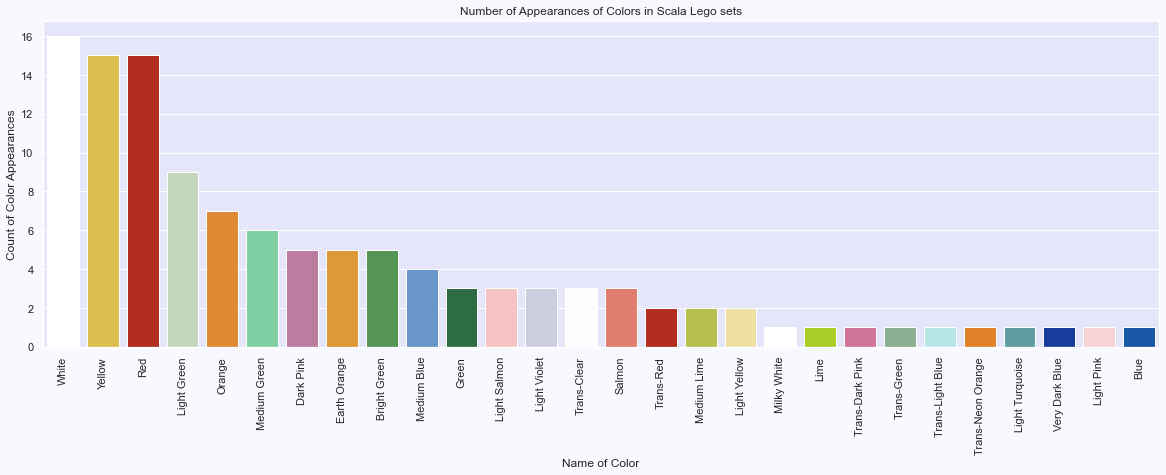

In [39]:
#create dataframe
scala = color_themes_pivot['Scala'].dropna().reset_index(name='count_color_appearance_in_theme').sort_values(by='count_color_appearance_in_theme',ascending=False)

#create an updated dataframe with the rgb value
scala_rgb = scala.merge(right=colors, how='inner', left_on='name', right_on='name')

#add # to each value in rgb column
scala_rgb['rgb'] = '#' + scala_rgb['rgb']

fig, ax = plt.subplots(figsize=(20, 6))
ax = sns.barplot(data=scala, x='name', y='count_color_appearance_in_theme',palette=scala_rgb['rgb']) #y is the number of times that a color appears in any set
plt.xticks(rotation=90)
ax.set(xlabel='Name of Color', ylabel='Count of Color Appearances', title='Number of Appearances of Colors in Scala Lego sets')

In [40]:
scala_rgb_unique_color = scala_rgb.merge(right=color_themes_grouped_unique_theme_cleaned, how='inner', left_on='name', right_on='name').drop(['id','rgb','is_trans','count_appearance_in_theme'], axis=1)
num_times_appears_scala = int(scala_rgb_unique_color['count_color_appearance_in_theme'])

print('Number of Times "Salmon" Appears in Scala Sets: ' + str(num_times_appears_scala))
print('\t')
print('Descriptive Statistics of Number of Times Each Color Appears in "Scala" Theme')
scala_rgb['count_color_appearance_in_theme'].describe().astype(int)

Number of Times "Salmon" Appears in Scala Sets: 3
	
Descriptive Statistics of Number of Times Each Color Appears in "Scala" Theme


count    28
mean      4
std       4
min       1
25%       1
50%       3
75%       5
max      16
Name: count_color_appearance_in_theme, dtype: int64

[Text(0.5, 0, 'Name of Color'),
 Text(0, 0.5, 'Count of Color Appearances'),
 Text(0.5, 1.0, 'Number of Appearances of Colors in Space Port Lego sets')]

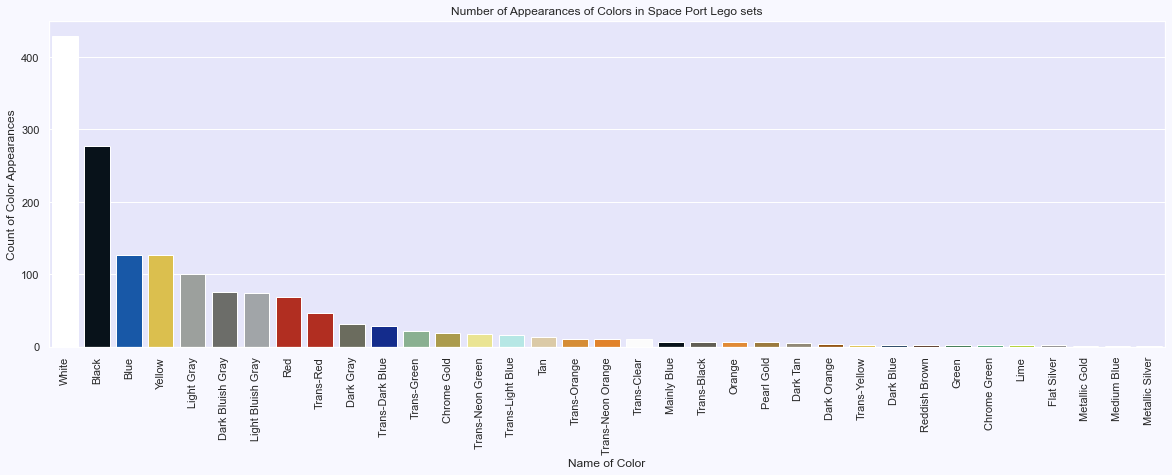

In [41]:
#create dataframe
space_port = color_themes_pivot['Space Port'].dropna().reset_index(name='count_color_appearance_in_theme').sort_values(by='count_color_appearance_in_theme',ascending=False)

#create an updated dataframe with the rgb value
space_port_rgb = space_port.merge(right=colors, how='inner', left_on='name', right_on='name')

#add # to each value in rgb column
space_port_rgb['rgb'] = '#' + space_port_rgb['rgb']

fig, ax = plt.subplots(figsize=(20, 6))
ax = sns.barplot(data=space_port, x='name', y='count_color_appearance_in_theme',palette=space_port_rgb['rgb']) #y is the number of times that a color appears in any set
plt.xticks(rotation=90)
ax.set(xlabel='Name of Color', ylabel='Count of Color Appearances', title='Number of Appearances of Colors in Space Port Lego sets')

In [42]:
space_port_rgb_unique_color = space_port_rgb.merge(right=color_themes_grouped_unique_theme_cleaned, how='inner', left_on='name', right_on='name').drop(['id','rgb','is_trans','count_appearance_in_theme'], axis=1)
num_times_appears_space_port = int(space_port_rgb_unique_color['count_color_appearance_in_theme'])

print('Number of Times "Chrome Green" Appears in Space Port Sets: ' + str(num_times_appears_space_port))
print('\t')
print('Descriptive Statistics of Number of Times Each Color Appears in "Space Port" Theme')
space_port_rgb['count_color_appearance_in_theme'].describe().astype(int)

Number of Times "Chrome Green" Appears in Space Port Sets: 2
	
Descriptive Statistics of Number of Times Each Color Appears in "Space Port" Theme


count     35
mean      44
std       86
min        1
25%        3
50%       10
75%       39
max      429
Name: count_color_appearance_in_theme, dtype: int64

[Text(0.5, 0, 'Name of Color'),
 Text(0, 0.5, 'Count of Color Appearances'),
 Text(0.5, 1.0, 'Number of Appearances of Colors in Clikits Lego sets')]

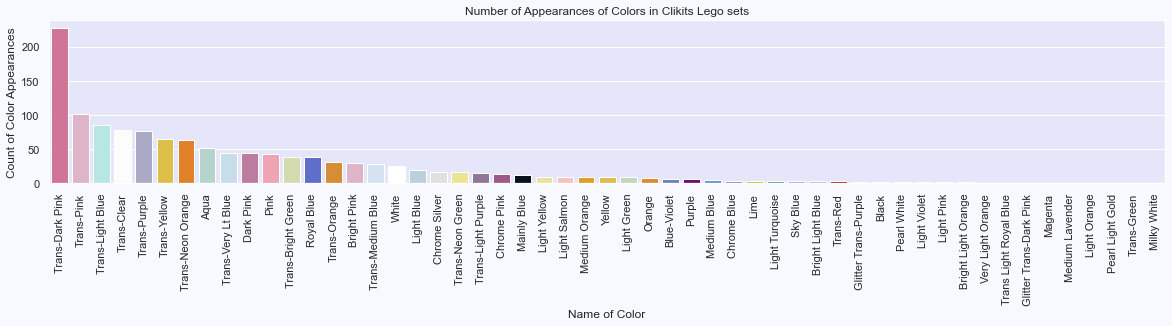

In [43]:
#create dataframe
clikits = color_themes_pivot['Clikits'].dropna().reset_index(name='count_color_appearance_in_theme').sort_values(by='count_color_appearance_in_theme',ascending=False)

#create an updated dataframe with the rgb value
clikits_rgb = clikits.merge(right=colors, how='inner', left_on='name', right_on='name')

#add # to each value in rgb column
clikits_rgb['rgb'] = '#' + clikits_rgb['rgb']

fig, ax = plt.subplots(figsize=(20, 3))
ax = sns.barplot(data=clikits, x='name', y='count_color_appearance_in_theme',palette=clikits_rgb['rgb']) #y is the number of times that a color appears in any set
plt.xticks(rotation=90)
ax.set(xlabel='Name of Color', ylabel='Count of Color Appearances', title='Number of Appearances of Colors in Clikits Lego sets')

In [44]:
clikits_rgb_unique_color = clikits_rgb.merge(right=color_themes_grouped_unique_theme_cleaned, how='inner', left_on='name', right_on='name').drop(['id','rgb','is_trans','count_appearance_in_theme'], axis=1)

trans_pink_clickets = clikits_rgb_unique_color[clikits_rgb_unique_color['name'] == 'Trans-Pink']
num_trans_pink_clickets = int(trans_pink_clickets['count_color_appearance_in_theme'])

trans_lr_blue_pink_clickets = clikits_rgb_unique_color[clikits_rgb_unique_color['name'] == 'Trans Light Royal Blue']
num_trans_lr_blue_pink_clickets = int(trans_lr_blue_pink_clickets['count_color_appearance_in_theme'])

print('Number of Times "Translucent Pink" Appears in Clikits Sets: ' + str(num_trans_pink_clickets))
print('Number of Times "Translucent Light Royal Blue" Appears in Clikits Sets: ' + str(num_trans_lr_blue_pink_clickets))
print('\t')
print('Descriptive Statistics of Number of Times Each Color Appears in "Clikits" Theme')
clikits_rgb['count_color_appearance_in_theme'].describe().astype(int)

Number of Times "Translucent Pink" Appears in Clikits Sets: 102
Number of Times "Translucent Light Royal Blue" Appears in Clikits Sets: 1
	
Descriptive Statistics of Number of Times Each Color Appears in "Clikits" Theme


count     53
mean      24
std       38
min        1
25%        2
50%        9
75%       31
max      227
Name: count_color_appearance_in_theme, dtype: int64

[Text(0.5, 0, 'Name of Color'),
 Text(0, 0.5, 'Count of Color Appearances'),
 Text(0.5, 1.0, 'Number of Appearances of Colors in Knights Kingdom II Lego sets')]

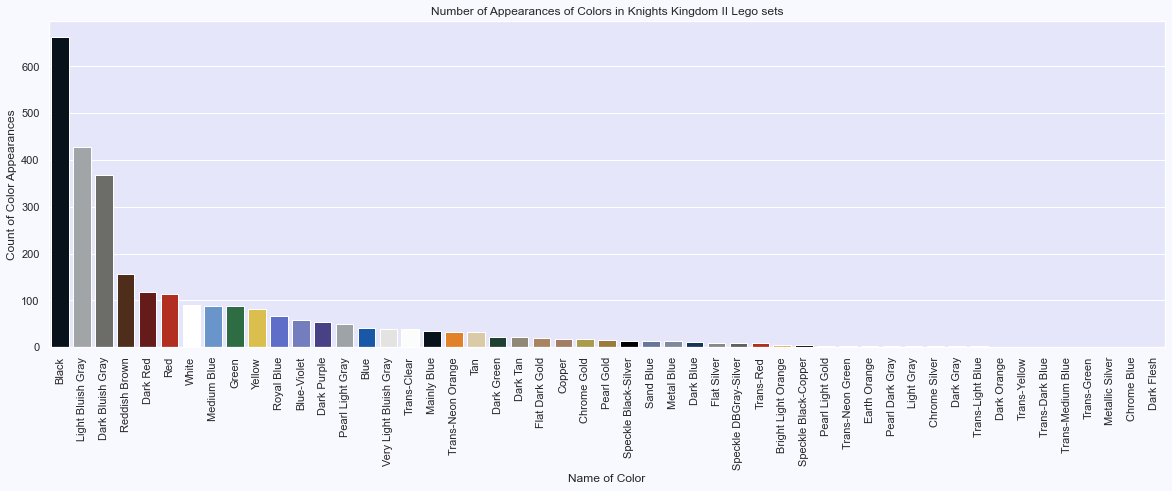

In [46]:
#create dataframe
knights_kingdom_ii = color_themes_pivot['Knights Kingdom II'].dropna().reset_index(name='count_color_appearance_in_theme').sort_values(by='count_color_appearance_in_theme',ascending=False)

#create an updated dataframe with the rgb value
knights_kingdom_ii_rgb = knights_kingdom_ii.merge(right=colors, how='inner', left_on='name', right_on='name')

#add # to each value in rgb column
knights_kingdom_ii_rgb['rgb'] = '#' + knights_kingdom_ii_rgb['rgb']

fig, ax = plt.subplots(figsize=(20, 6))
ax = sns.barplot(data=knights_kingdom_ii, x='name', y='count_color_appearance_in_theme',palette=knights_kingdom_ii_rgb['rgb']) #y is the number of times that a color appears in any set
plt.xticks(rotation=90)
ax.set(xlabel='Name of Color', ylabel='Count of Color Appearances', title='Number of Appearances of Colors in Knights Kingdom II Lego sets')

In [47]:
#Speckle Black-Copper
#Speckle DBGray-Silver

knights_kingdom_ii_rgb_unique_color = knights_kingdom_ii_rgb.merge(right=color_themes_grouped_unique_theme_cleaned, how='inner', left_on='name', right_on='name').drop(['id','rgb','is_trans','count_appearance_in_theme'], axis=1)

speckle_black_copper_knights_kingdom_ii = knights_kingdom_ii_rgb_unique_color[knights_kingdom_ii_rgb_unique_color['name'] == 'Speckle Black-Copper']
num_speckle_black_copper_knights_kingdom_ii = int(speckle_black_copper_knights_kingdom_ii['count_color_appearance_in_theme'])

speckle_silver_knights_kingdom_ii = knights_kingdom_ii_rgb_unique_color[knights_kingdom_ii_rgb_unique_color['name'] == 'Speckle DBGray-Silver']
num_speckle_silver_knights_kingdom_ii = int(speckle_silver_knights_kingdom_ii['count_color_appearance_in_theme'])

print('Number of Times "Speckle Black-Copper" Appears in Knights Kingdom II Sets Sets: ' + str(num_speckle_black_copper_knights_kingdom_ii))
print('Number of Times "Speckle DBGray-Silver" Appears in Knights Kingdom II Sets Sets: ' + str(num_speckle_silver_knights_kingdom_ii))
print('\t')
print('Descriptive Statistics of Number of Times Each Color Appears in "Knights Kingdom II" Theme')
knights_kingdom_ii_rgb['count_color_appearance_in_theme'].describe().astype(int)


Number of Times "Speckle Black-Copper" Appears in Knights Kingdom II Sets Sets: 5
Number of Times "Speckle DBGray-Silver" Appears in Knights Kingdom II Sets Sets: 8
	
Descriptive Statistics of Number of Times Each Color Appears in "Knights Kingdom II" Theme


count     51
mean      56
std      118
min        1
25%        2
50%       15
75%       52
max      664
Name: count_color_appearance_in_theme, dtype: int64

[Text(0.5, 0, 'Name of Color'),
 Text(0, 0.5, 'Count of Color Appearances'),
 Text(0.5, 1.0, 'Number of Appearances of Colors in Basic Lego sets')]

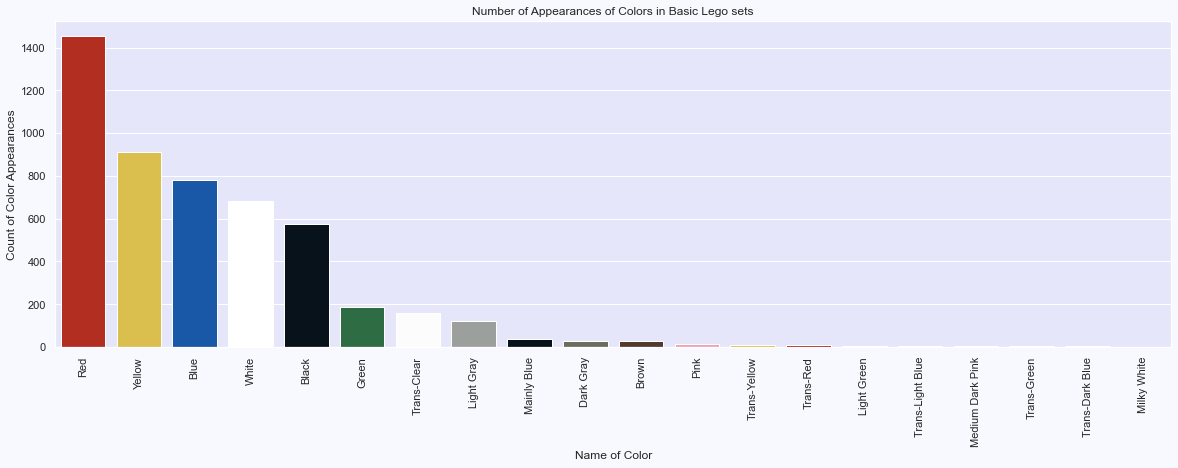

In [48]:
#create dataframe
basic = color_themes_pivot['Basic'].dropna().reset_index(name='count_color_appearance_in_theme').sort_values(by='count_color_appearance_in_theme',ascending=False)

#create an updated dataframe with the rgb value
basic_rgb = basic.merge(right=colors, how='inner', left_on='name', right_on='name')

#add # to each value in rgb column
basic_rgb['rgb'] = '#' + basic_rgb['rgb']


fig, ax = plt.subplots(figsize=(20, 6))
ax = sns.barplot(data=basic, x='name', y='count_color_appearance_in_theme',palette=basic_rgb['rgb']) #y is the number of times that a color appears in any set
plt.xticks(rotation=90)
ax.set(xlabel='Name of Color', ylabel='Count of Color Appearances', title='Number of Appearances of Colors in Basic Lego sets')


In [49]:
basic_rgb_unique_color = basic_rgb.merge(right=color_themes_grouped_unique_theme_cleaned, how='inner', left_on='name', right_on='name').drop(['id','rgb','is_trans','count_appearance_in_theme'], axis=1)
num_times_appears_basic = int(basic_rgb_unique_color['count_color_appearance_in_theme'])

print('Number of Times "Medium Dark Pink" Appears in Basic Sets: ' + str(num_times_appears_basic))
print('\t')
print('Descriptive Statistics of Number of Times Each Color Appears in "Basic" Theme')
basic_rgb['count_color_appearance_in_theme'].describe().astype(int)

Number of Times "Medium Dark Pink" Appears in Basic Sets: 6
	
Descriptive Statistics of Number of Times Each Color Appears in "Basic" Theme


count      20
mean      251
std       408
min         2
25%         7
50%        26
75%       285
max      1452
Name: count_color_appearance_in_theme, dtype: int64

In [50]:
#Analysis 3 Conclusions: After looking at the composition of the themes that have sets that can be defined by a unique color, the number of times that color appears in each of the 7 themes is 
#less than the mean of the number of times a given color appears in the theme. This indicates that the color does not show up often enough in the themes for it to allow identification of many sets
#of that theme. This is with the exception of the Translucent Pink color that appears in the Clikits theme, which appears >100 times in the theme, which is greater than the mean any given
#color appears in the theme (mean = 24). Therefore, manysets can be identified as being from the Clikit theme from the presence of Translucent Pink bricks.

In [51]:
#Analysis 4: What sets include these colors? The theme for how many sets can be determined with this information?
#join color_themes_grouped_unique_theme_cleaned to color_themes on name
sets_by_unique_color = color_themes_grouped_unique_theme_cleaned.merge(right=color_themes, how='inner', left_on='name', right_on='name')
sets_by_unique_color


,count_appearance_in_theme,name_theme_x,name,is_rare,id_colors,rgb,is_trans,quantity,set_num,name_set,year,theme_id,num_parts,id,name_theme_y,parent_id
0,1,Clikits,Trans-Pink,False,230,E4ADC8,t,1.0,7528-1,Designer Desk Set,2004,500,71,500,Clikits,NaN
1,1,Clikits,Trans-Pink,False,230,E4ADC8,t,2.0,7528-1,Designer Desk Set,2004,500,71,500,Clikits,NaN
2,1,Clikits,Trans-Pink,False,230,E4ADC8,t,1.0,7528-1,Designer Desk Set,2004,500,71,500,Clikits,NaN
3,1,Clikits,Trans-Pink,False,230,E4ADC8,t,1.0,7531-1,The Ultimate Jewelry Collection,2004,500,152,500,Clikits,NaN
4,1,Clikits,Trans-Pink,False,230,E4ADC8,t,1.0,1385-1,Clikits Bracelet Sample Set,2003,500,13,500,Clikits,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130,1,Space Port,Chrome Green,True,62,3CB371,f,1.0,6454-1,Countdown Corner,1999,93,131,93,Space Port,50.0
131,1,Space Port,Chrome Green,True,62,3CB371,f,1.0,6456-1,Mission Control,1999,93,499,93,Space Port,50.0
132,1,Star Wars,Chrome Black,True,64,1B2A34,f,1.0,4547551-1,Darth Vader 10 Year Anniversary Promotional Mi...,2009,158,7,158,Star Wars,NaN
133,1,Star Wars,Chrome Black,True,64,1B2A34,f,1.0,4547551-1,Darth Vader 10 Year Anniversary Promotional Mi...,2009,158,7,158,Star Wars,NaN


[Text(0, 0, '102'),
 Text(0, 0, '8'),
 Text(0, 0, '6'),
 Text(0, 0, '5'),
 Text(0, 0, '5'),
 Text(0, 0, '3'),
 Text(0, 0, '3'),
 Text(0, 0, '2'),
 Text(0, 0, '1')]

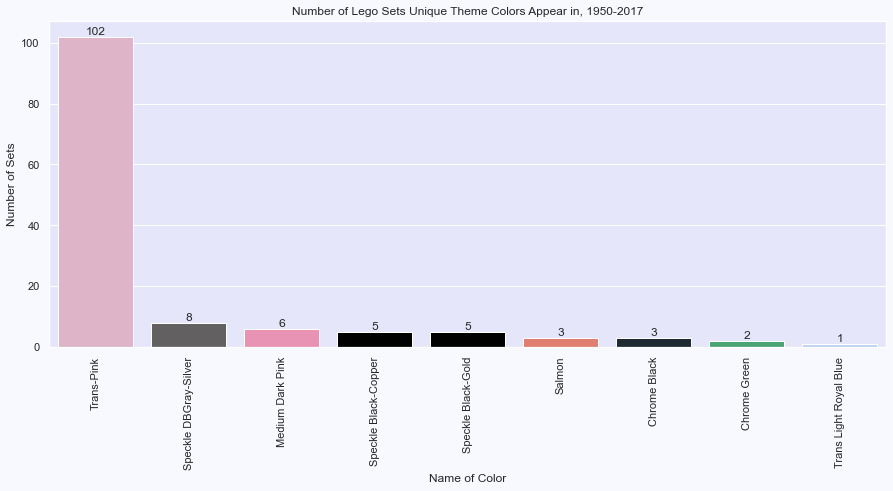

In [52]:
#count how many sets there are that represent the 9 colors
sets_by_unique_color_count = sets_by_unique_color['name'].value_counts().reset_index(name='number_of_sets')
sets_by_unique_color_count

#join with color_themes_grouped_unique_theme_cleaned to see the themes as well
sets_by_unique_color_theme = sets_by_unique_color_count.merge(right=color_themes_grouped_unique_theme_cleaned, how='inner',left_on='index',right_on='name')

#drop irrelevant columns
sets_by_unique_color_theme_cleaned = sets_by_unique_color_theme.drop(['index','count_appearance_in_theme'], axis=1)

#create an updated dataframe with the rgb value
unique_rgb = sets_by_unique_color_theme_cleaned.merge(right=colors, how='inner', left_on='name', right_on='name')

#add # to each value in rgb column
unique_rgb['rgb'] = '#' + unique_rgb['rgb']

#create chart to show count of sets of that color
fig, ax = plt.subplots(figsize=(15, 6))
ax = sns.barplot(data=sets_by_unique_color_theme_cleaned, x='name', y='number_of_sets', palette=unique_rgb['rgb']) 
plt.xticks(rotation=90)
ax.set(xlabel='Name of Color', ylabel='Number of Sets', title='Number of Lego Sets Unique Theme Colors Appear in, 1950-2017')
ax.bar_label(ax.containers[0])


In [53]:
#percent unique sets
num_unique_sets = int(sets_by_unique_color_theme_cleaned['number_of_sets'].sum())
print('Number of Sets with a Color Unique to its Theme: ' + str(num_unique_sets))
num_sets = int(sets['set_num'].count())
print('Total Number of Sets: ' + str(num_sets))
percent_unique_sets = str(round(num_unique_sets / num_sets * 100, 2)) + '%'
print('Percentage of sets where their theme can be identified by a unique color: ' + percent_unique_sets)



Number of Sets with a Color Unique to its Theme: 135
Total Number of Sets: 11673
Percentage of sets where their theme can be identified by a unique color: 1.16%


In [54]:
sets_by_unique_color.head(2)

,count_appearance_in_theme,name_theme_x,name,is_rare,id_colors,rgb,is_trans,quantity,set_num,name_set,year,theme_id,num_parts,id,name_theme_y,parent_id
0,1,Clikits,Trans-Pink,False,230,E4ADC8,t,1.0,7528-1,Designer Desk Set,2004,500,71,500,Clikits,NaN
1,1,Clikits,Trans-Pink,False,230,E4ADC8,t,2.0,7528-1,Designer Desk Set,2004,500,71,500,Clikits,NaN


In [55]:
#set min and max year based on the min year and max year that the colors appeared in
max_year = sets_by_unique_color['year'].max()
min_year = sets_by_unique_color['year'].min()

#create a dataframe of sets that occured in this time period
sets_in_years = sets[(sets['year'] >= min_year) & (sets['year'] <= max_year)]

n = len(pd.unique(sets_in_years['set_num']))
print('Number of Sets from ' + str(min_year) + ' to ' + str(max_year) + ': ', n)

#find new percentage based on this time period from 1993 - 2011
percent_unique_sets = str(round(num_unique_sets / n * 100, 2)) + '%'
print('Percentage of sets from 1993 - 2011 where their theme can be identified by a unique color: ' + percent_unique_sets)

#Analysis #4 Conclusions: These findings do not support the hypothesis. Given that the theme of only 1.16% of all Lego sets from 1950-2017 can be identified by a unique color does not support that the theme of Lego sets
#can be determined by a unique color. Even when adjusting the time frame to only include the years when the unique colors were used
#in sets, only 2.3% of set themes can be identified from a unique color

Number of Sets from 1993 to 2011:  5859
Percentage of sets from 1993 - 2011 where their theme can be identified by a unique color: 2.3%


In [ ]:
#Overall Analysis:
#The hypothesis was not supported based on analysis. However, there is room for additional analysis. One possible
#avenue for analysis could be to explore color combinations that could identify a theme. For example, when 'color x' and 'color y'
#appear together, we know we have a set in 'theme x'. Another avenue could be to explore the colors and type of bricks combinations.
#Although the hypothesis wasn't supported, this is a good thing! Ff there are few sets whose themes can be identified by a 
#single color then that means that the colors included in most sets can be used to build sets in other themes, meaning the Lego brick 